In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import warnings
warnings.filterwarnings("ignore")

In [31]:
cd Downloads

[WinError 2] The system cannot find the file specified: 'Downloads'
C:\Users\18329\Downloads


In [32]:
df= pd.read_excel('dfclean.xlsx')

In [33]:
df

,SAMPWEIGHT,AGE,SEX,RACEA,EDUC,Income,BMI,BWGTGRAM,Medicare
0,1406,16,Female,White,Ten Grade,74999,0,2438,PreNatal
1,3539,16,Female,White,Nine Grade,34999,0,2212,PreNatal
2,6498,16,Female,Black,Ten Grade,34999,0,2438,PreNatal
3,4211,16,Male,White,Ten Grade,34999,0,1418,PreNatal
4,13588,16,Female,Black,Ten Grade,100000,0,2382,PreNatal
...,...,...,...,...,...,...,...,...,...
956,7516,16,Female,White,Ten Grade,100000,0,766,PreNatal
957,18664,17,Female,Black,Eleven Grade,34999,0,2070,PreNatal
958,43837,16,Female,White,Ten Grade,74999,0,2268,PreNatal
959,3775,16,Female,White,Ten Grade,99999,0,1985,PreNatal


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SAMPWEIGHT  961 non-null    int64 
 1   AGE         961 non-null    int64 
 2   SEX         961 non-null    object
 3   RACEA       961 non-null    object
 4   EDUC        961 non-null    object
 5   Income      961 non-null    object
 6   BMI         961 non-null    int64 
 7   BWGTGRAM    961 non-null    int64 
 8   Medicare    961 non-null    object
dtypes: int64(4), object(5)
memory usage: 67.7+ KB


In [35]:
num_df = df.select_dtypes(include=['int64','float'])
cat_df = df.select_dtypes(include=['object'])

<AxesSubplot:>

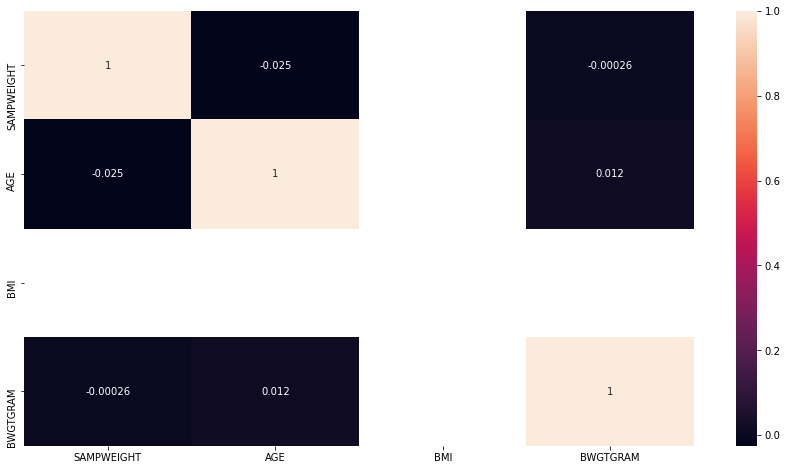

In [36]:
plt.subplots(figsize = (15,8))
sns.heatmap(num_df.corr(),annot= True)

In [37]:
num_corr= num_df.corr()['AGE'].abs().sort_values()
num_corr

BWGTGRAM      0.012494
SAMPWEIGHT    0.025125
AGE           1.000000
BMI                NaN
Name: AGE, dtype: float64

In [38]:
cat_dummies= pd.get_dummies(cat_df, drop_first=True)
cat_dummies.head()

,SEX_Male,RACEA_Asian Indian,RACEA_Black,RACEA_Chinese,RACEA_Multiple Race,RACEA_Other,RACEA_Pacific Islander,RACEA_White,EDUC_College No D,EDUC_Eight Grade,...,EDUC_Ten Grade,EDUC_Twelve No Diploma,EDUC_six Grade,Income_74999,Income_99999,Income_100000,Income_Unkown,Medicare_No,Medicare_PreNatal,Medicare_Unkown
0,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [39]:
df1= pd.concat([cat_dummies,num_df] ,axis=1)
df1.head()

,SEX_Male,RACEA_Asian Indian,RACEA_Black,RACEA_Chinese,RACEA_Multiple Race,RACEA_Other,RACEA_Pacific Islander,RACEA_White,EDUC_College No D,EDUC_Eight Grade,...,Income_99999,Income_100000,Income_Unkown,Medicare_No,Medicare_PreNatal,Medicare_Unkown,SAMPWEIGHT,AGE,BMI,BWGTGRAM
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1406,16,0,2438
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,3539,16,0,2212
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,6498,16,0,2438
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,4211,16,0,1418
4,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0,13588,16,0,2382


In [40]:
x= df1.iloc[:,:-1]
print(x.shape)
y= df1.iloc[:,-1:]
print(y.shape)

(961, 28)
(961, 1)


In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.4, random_state=100)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(576, 28)
(576, 1)
(385, 28)
(385, 1)


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [43]:
model= LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [44]:
train_predict = model.predict(x_train)

metrics.r2_score(train_predict,y_train)

-20.153938623158357

In [45]:
test_predict= model.predict(x_test)
metrics.r2_score(test_predict,y_test)

-21.84499288353508

<AxesSubplot:xlabel='BWGTGRAM'>

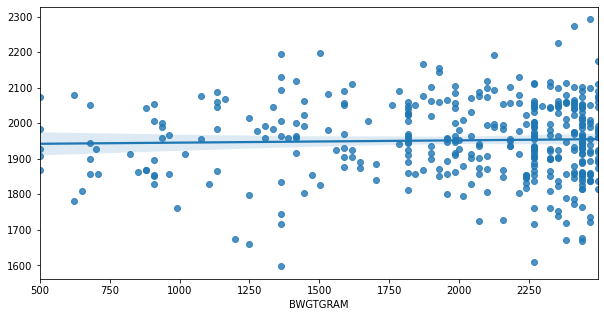

In [46]:
plt.subplots(figsize = (10,5))
sns.regplot(y_test, test_predict)